# Programovaná implementace SIR modelu


--- Chřipka ---
Vrchol epidemie nastal přibližně v čase: 33.18 dní.
Odhadovaná doba trvání epidemie: 0.0 dní.
Celkový počet obyvatel: 100
Reprodukční číslo (R0): 1.5
Průměrná doba infekčnosti: 5 dní


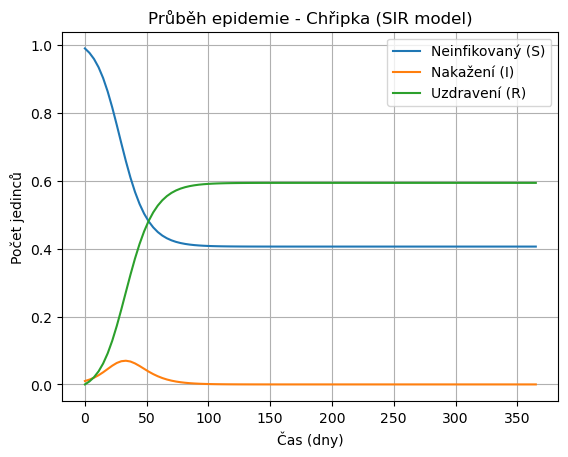

--- Spalničky ---
Vrchol epidemie nastal přibližně v čase: 3.69 dní.
Odhadovaná doba trvání epidemie: 0.0 dní.
Celkový počet obyvatel: 100
Reprodukční číslo (R0): 15
Průměrná doba infekčnosti: 9 dní


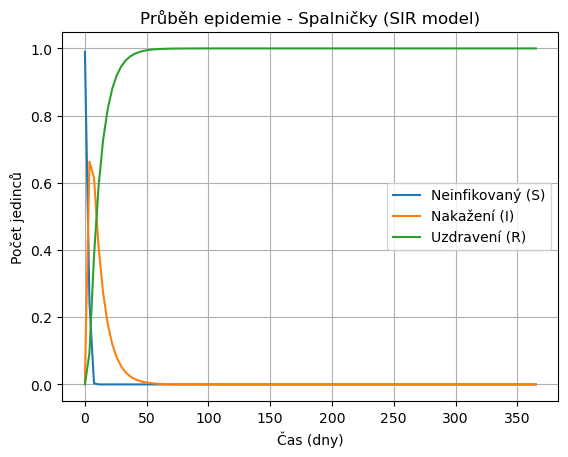

--- COVID-19 ---
Vrchol epidemie nastal přibližně v čase: 29.49 dní.
Odhadovaná doba trvání epidemie: 0.0 dní.
Celkový počet obyvatel: 100
Reprodukční číslo (R0): 2
Průměrná doba infekčnosti: 7 dní


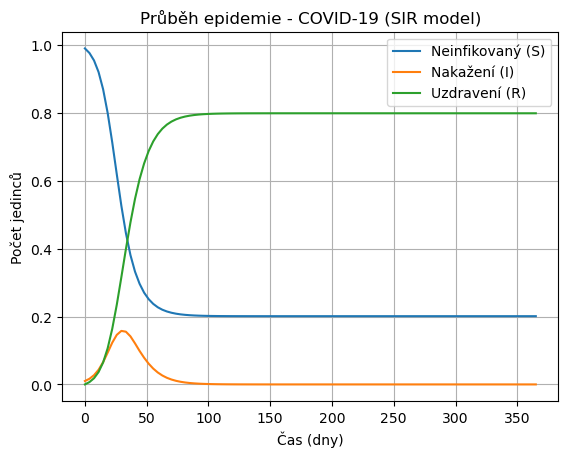

--- Zarděnky ---
Vrchol epidemie nastal přibližně v čase: 11.06 dní.
Odhadovaná doba trvání epidemie: 0.0 dní.
Celkový počet obyvatel: 100
Reprodukční číslo (R0): 5
Průměrná doba infekčnosti: 7 dní


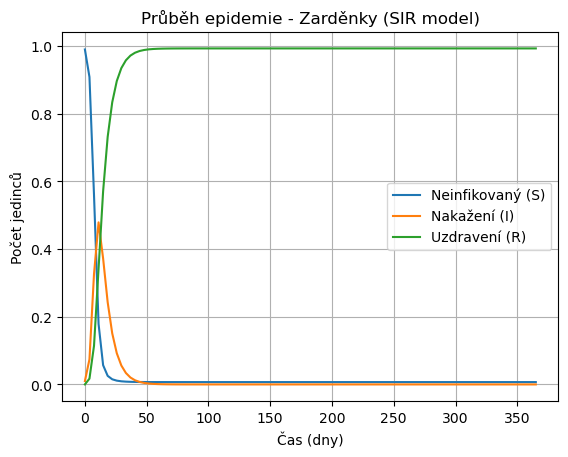

--- Příušnice ---
Vrchol epidemie nastal přibližně v čase: 11.06 dní.
Odhadovaná doba trvání epidemie: 0.0 dní.
Celkový počet obyvatel: 100
Reprodukční číslo (R0): 5
Průměrná doba infekčnosti: 8 dní


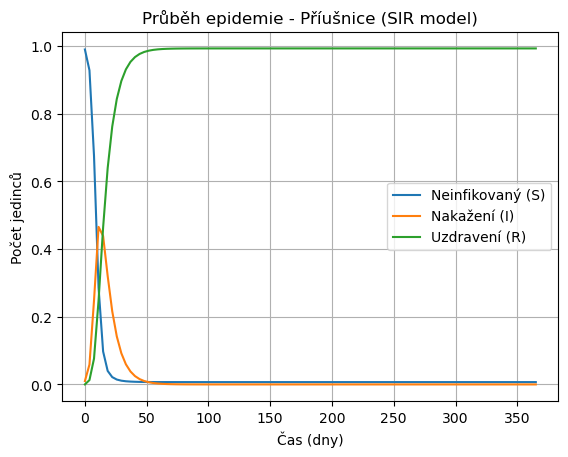

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def spustit_a_zobrazit_sir_simulaci(nazev_nemoci, pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo, doba_infekcnosti, casovy_rozsah):
    gamma = 1 / doba_infekcnosti
    beta = reprodukcni_cislo * gamma
    pocet_vnimavych_na_zacatku = pocet_obyvatel - pocet_nakazenych_na_zacatku
    pocet_uzdravenych_na_zacatku = 0
    pocatecni_podminky = [pocet_vnimavych_na_zacatku/100, pocet_nakazenych_na_zacatku/100, pocet_uzdravenych_na_zacatku]
    t_eval = np.linspace(casovy_rozsah[0], casovy_rozsah[1], 100)
    vysledek = solve_ivp(sir_model, casovy_rozsah, pocatecni_podminky, args=(beta, gamma), dense_output=True, t_eval=t_eval)

    index_vrcholu = np.argmax(vysledek.y[1])
    cas_vrcholu = vysledek.t[index_vrcholu]
    max_nakazenych = vysledek.y[1][index_vrcholu]

    konec_epidemie_index = np.where(vysledek.y[1] < 1)[0]
    if len(konec_epidemie_index) > 0:
        doba_trvani_epidemie = vysledek.t[konec_epidemie_index[0]]
    else:
        doba_trvani_epidemie = "Simulace neukázala konec epidemie v daném časovém rozsahu."

    print(f"--- {nazev_nemoci} ---")
    print(f"Vrchol epidemie nastal přibližně v čase: {cas_vrcholu:.2f} dní.")
    print(f"Odhadovaná doba trvání epidemie: {doba_trvani_epidemie} dní.")
    print(f"Celkový počet obyvatel: {pocet_obyvatel}")
    print(f"Reprodukční číslo (R0): {reprodukcni_cislo}")
    print(f"Průměrná doba infekčnosti: {doba_infekcnosti} dní")

    
    plt.plot(vysledek.t, vysledek.y[0], label='Neinfikovaný (S)')
    plt.plot(vysledek.t, vysledek.y[1], label='Nakažení (I)')
    plt.plot(vysledek.t, vysledek.y[2], label='Uzdravení (R)')
    plt.xlabel("Čas (dny)")
    plt.ylabel("Počet jedinců")
    plt.title(f"Průběh epidemie - {nazev_nemoci} (SIR model)")
    plt.legend()
    plt.grid(True)
    plt.show()



if __name__ == '__main__':
    pocet_obyvatel = 100
    pocet_nakazenych_na_zacatku = 1
    casovy_rozsah = (0, 365)

    nazev_chripka = "Chřipka"
    reprodukcni_cislo_chripka = 1.5
    doba_infekcnosti_chripka = 5
    spustit_a_zobrazit_sir_simulaci(nazev_chripka, pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo_chripka, doba_infekcnosti_chripka, casovy_rozsah)

    nazev_spalnicky = "Spalničky"
    reprodukcni_cislo_spalnicky = 15
    doba_infekcnosti_spalnicky = 9
    spustit_a_zobrazit_sir_simulaci(nazev_spalnicky, pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo_spalnicky, doba_infekcnosti_spalnicky, casovy_rozsah)

    nazev_covid = "COVID-19"
    reprodukcni_cislo_covid = 2
    doba_infekcnosti_covid = 7
    spustit_a_zobrazit_sir_simulaci(nazev_covid, pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo_covid, doba_infekcnosti_covid, casovy_rozsah)


    nazev_zardenky = "Zarděnky"
    reprodukcni_cislo_zardenky = 5
    doba_infekcnosti_zardenky = 7 
    spustit_a_zobrazit_sir_simulaci(nazev_zardenky, pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo_zardenky, doba_infekcnosti_zardenky, casovy_rozsah)

    nazev_priusnice = "Příušnice"
    reprodukcni_cislo_priusnice = 5
    doba_infekcnosti_priusnice = 8
    spustit_a_zobrazit_sir_simulaci(nazev_priusnice , pocet_obyvatel, pocet_nakazenych_na_zacatku, reprodukcni_cislo_priusnice , doba_infekcnosti_priusnice ,casovy_rozsah)